In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/content/1_boston_housing.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [8]:

data = data.dropna()

<Axes: >

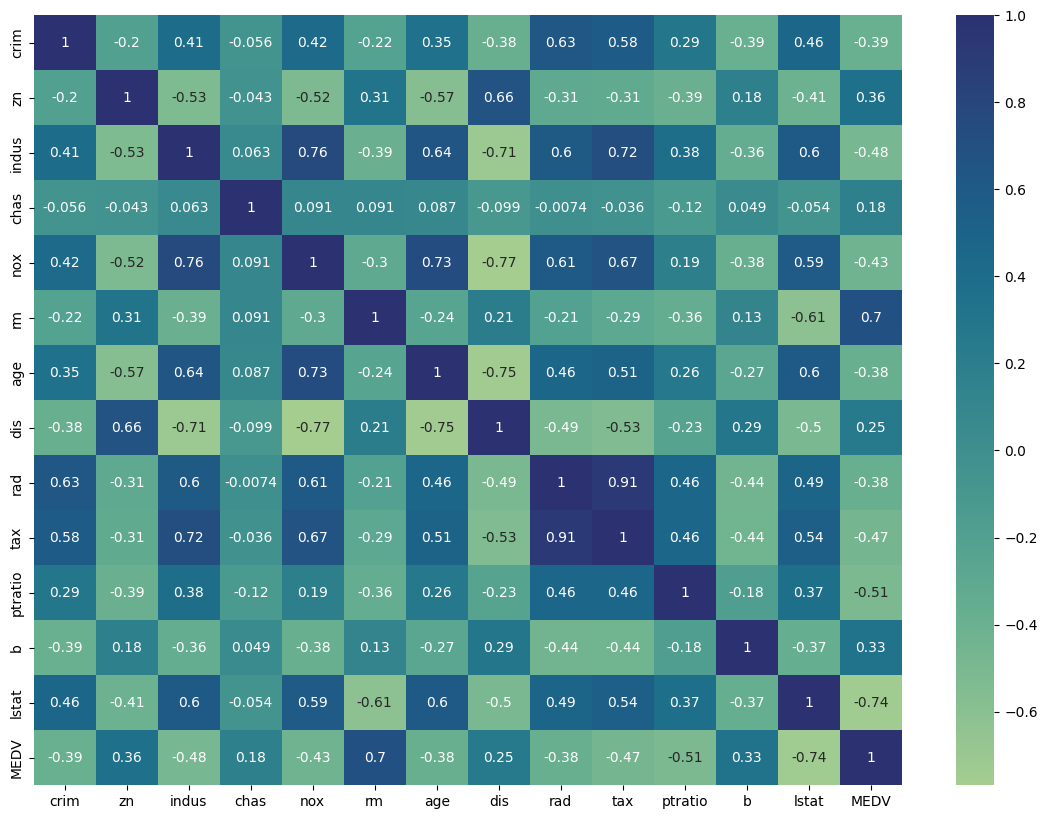

In [9]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), cmap='crest', annot=True)

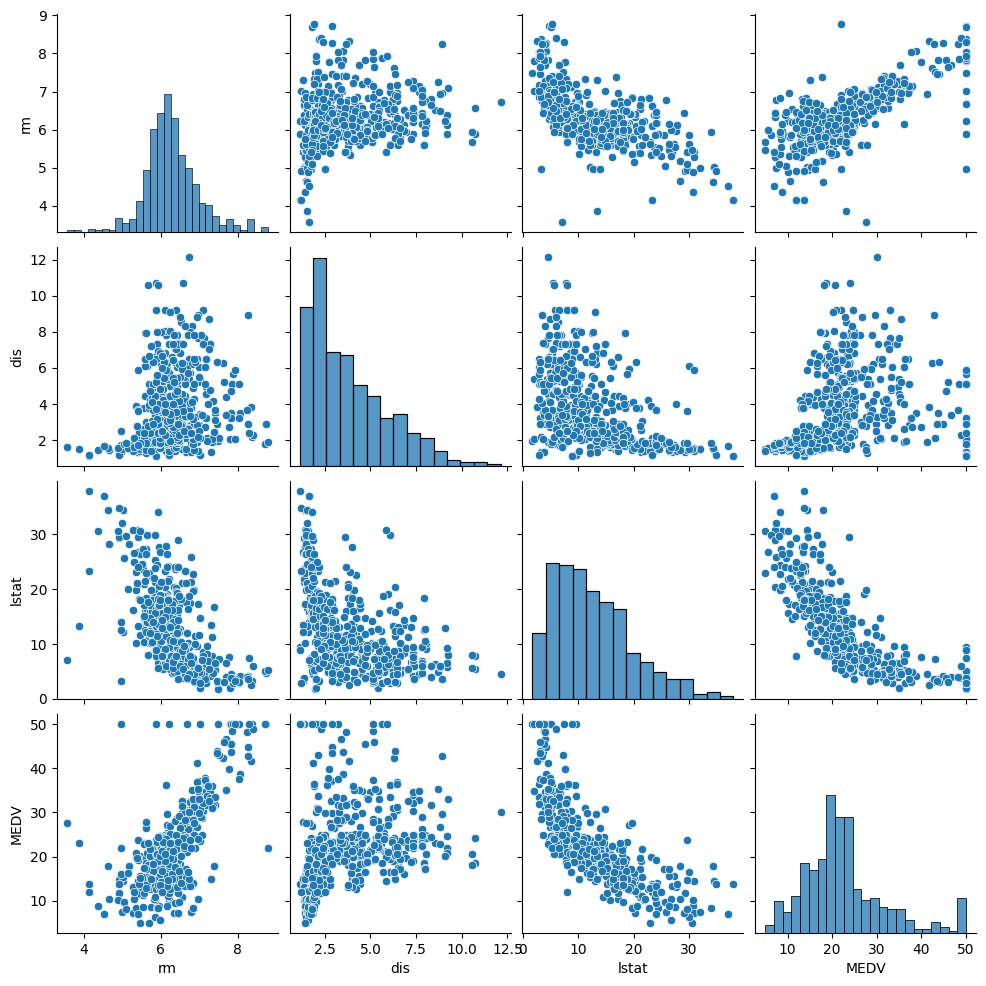

In [12]:
sns.pairplot(data[['rm', 'dis', 'lstat', 'MEDV']])

In [13]:
X = data[['rm', 'dis', 'lstat']]
y = data['MEDV']

In [14]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)


In [15]:
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(3)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, restore_best_weights=True)

In [19]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.fit(train_x_scaled, train_y, validation_data=(test_x_scaled, test_y), epochs=100, callbacks=[early_stopping])

Epoch 1/100
13/13 [==============================] - 3s 24ms/step - loss: 580.7764 - mse: 580.7764 - val_loss: 572.5405 - val_mse: 572.5405
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 541.8419 - mse: 541.8419 - val_loss: 519.5868 - val_mse: 519.5868
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 466.2733 - mse: 466.2733 - val_loss: 415.2820 - val_mse: 415.2820
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 329.2957 - mse: 329.2957 - val_loss: 245.3553 - val_mse: 245.3553
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 160.5305 - mse: 160.5305 - val_loss: 81.6948 - val_mse: 81.6948
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 83.1169 - mse: 83.1169 - val_loss: 42.5159 - val_mse: 42.5159
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 59.2212 - mse: 59.2212 - val_loss: 32.8792 - val_mse: 32.8792
Epoch 8/100
13/13 [=================

In [20]:
model.evaluate(test_x_scaled, test_y)

4/4 [==============================] - 0s 3ms/step - loss: 9.9685 - mse: 9.9685


[9.968542098999023, 9.968542098999023]